# import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
sales=pd.read_csv('advertising_sales.csv')
sales

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
sales.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
sales.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

# checking for null values

In [8]:
sales.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:>

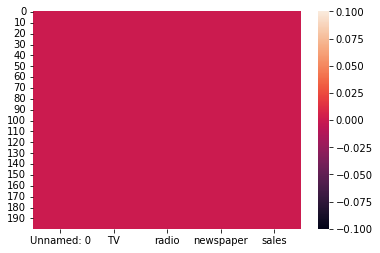

In [9]:
sns.heatmap(sales.isnull())

# EDA

In [10]:
sales.sales.value_counts(ascending=False)

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: sales, Length: 121, dtype: int64

<AxesSubplot:xlabel='Count', ylabel='sales'>

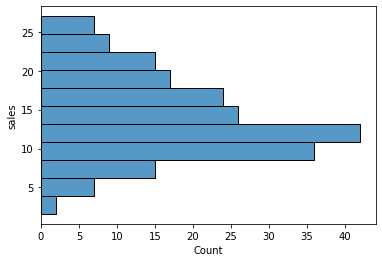

In [17]:
sns.histplot(data=sales,y='sales')

<AxesSubplot:xlabel='TV', ylabel='sales'>

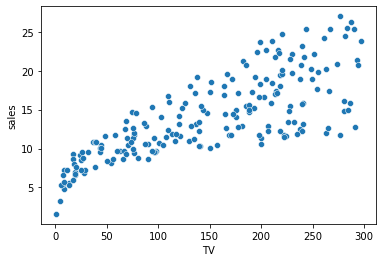

In [19]:
sns.scatterplot(x='TV',y='sales',data=sales)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

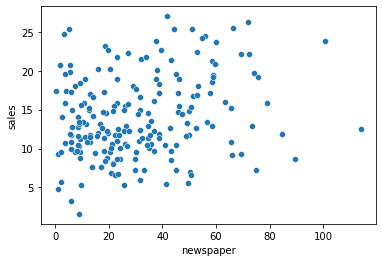

In [21]:
sns.scatterplot(x='newspaper',y='sales',data=sales)

<AxesSubplot:xlabel='radio', ylabel='sales'>

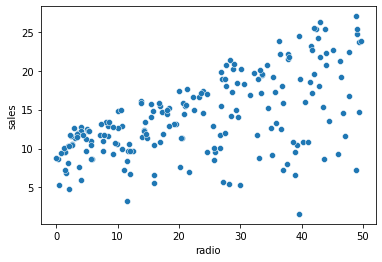

In [22]:
sns.scatterplot(x='radio',y='sales',data=sales)

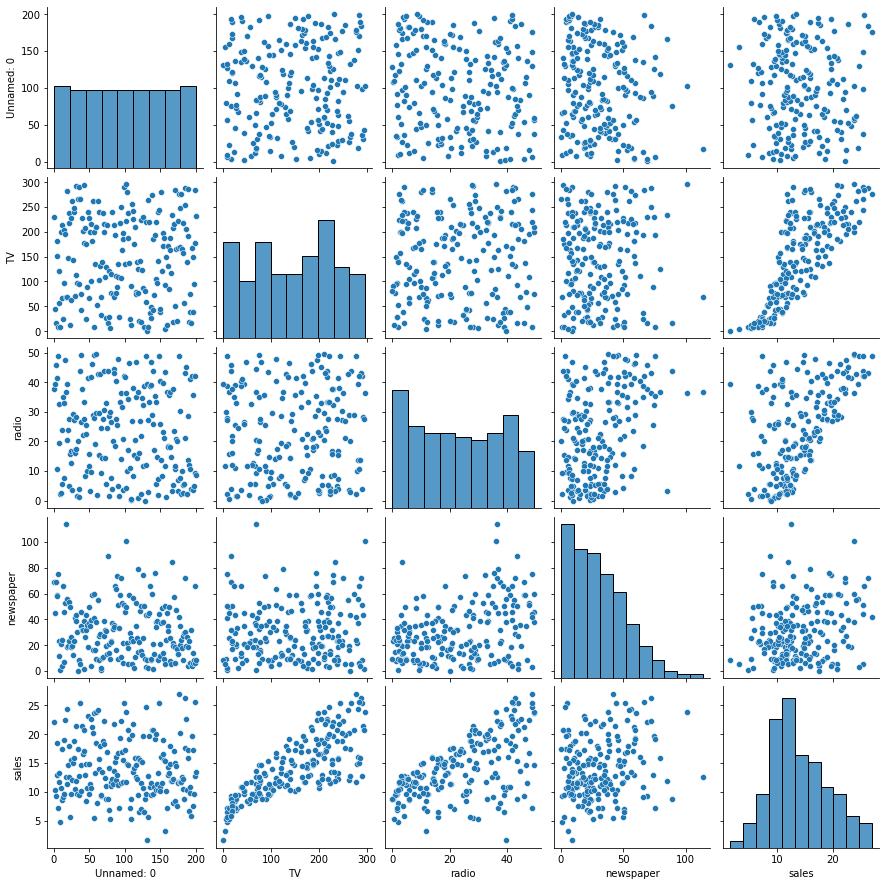

In [24]:
sns.pairplot(sales)

# checking for correlation

In [25]:
sales.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

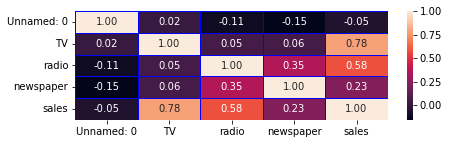

In [27]:
plt.figure(figsize=(7,2))
sns.heatmap(sales.corr(),annot=True,linecolor='blue',linewidth=1,fmt='.2f')

# description of data

In [28]:
sales.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


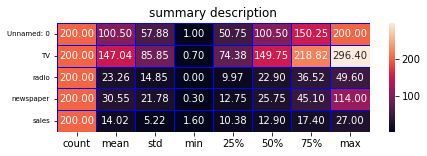

In [33]:
plt.figure(figsize=(7,2))
sns.heatmap(sales.describe().transpose(),2,annot=True,linewidth=1,linecolor='blue',fmt='.2f')
plt.xticks(fontsize=(10))
plt.yticks(fontsize=(7))
plt.title('summary description')
plt.savefig('heatmap.png')
plt.show()

Unnamed: 0       AxesSubplot(0.125,0.125;0.133621x0.755)
TV            AxesSubplot(0.285345,0.125;0.133621x0.755)
radio          AxesSubplot(0.44569,0.125;0.133621x0.755)
newspaper     AxesSubplot(0.606034,0.125;0.133621x0.755)
sales         AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

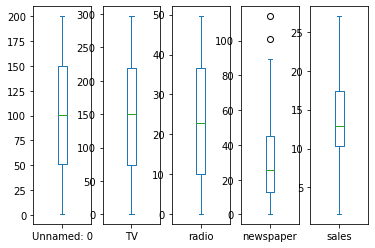

In [37]:
sales.plot(kind='box',subplots=True)

# checking for skewness

In [38]:
sales.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

# spliting the dataset

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [43]:
x=sales.iloc[:,0:-1]
x

,Unnamed: 0,TV,radio,newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [45]:
y=sales.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [47]:
print(y.shape, y_train.shape, y_test.shape)

(200,) (160,) (40,)


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [53]:
lr=LinearRegression()

In [55]:
lr.fit(x_train,y_train)

LinearRegression()

In [57]:
lr.score(x_train,y_train)

0.8931443451313652

In [58]:
pred=lr.predict(x_test)
print('predicted result price:',pred)
print('actual price',y_test)

predicted result price: [16.35861148  9.32266571 19.42462476 12.61224418  7.29008397 10.15272454
 23.95547495  8.92462981 17.71478023 13.89251807 12.25056458 14.31532256
 15.63777418 12.23552213 12.29504393 11.84356014 16.25645617 17.61031237
 17.25499527 21.77249271 18.43081768  8.72790856 10.64403834 11.72179099
  6.47956767 13.42840398 21.99279667 13.56112561 23.22610354 11.51085004
 16.87033556 21.59405181 10.26009256  7.61271966  9.9159987   8.02917935
 13.30381267 10.29002683 11.9907067   9.62663351]
actual price 40     16.6
51     10.7
139    20.7
197    12.8
170     8.4
82     11.3
183    26.2
46     10.6
70     18.3
100    11.7
179    12.6
83     13.6
25     12.0
190    10.8
159    12.9
173    11.7
95     16.9
3      18.5
41     17.1
58     23.8
14     19.0
143    10.4
12      9.2
6      11.8
182     8.7
161    13.3
128    24.7
122    11.6
101    23.8
86     12.0
64     18.0
47     23.2
158     7.3
34      9.5
38     10.1
196     9.7
4      12.9
72      8.8
67     13.4
145    

In [59]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [60]:
print('error')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared erroe:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error
Mean absolute error: 1.1974255621096528
Mean squared erroe: 2.163593968720138
Root Mean Squared Error: 1.4709160304790134


In [61]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9134449674582059
